In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.pipeline import make_pipeline
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [64]:
import pandas as pd

# Load the training set
train_df = pd.read_csv('train_set.csv')

# Load the test set
test_df = pd.read_csv('test_set.csv')

# Load the sample submission file
sample_submission_df = pd.read_csv('sample_submission.csv')


In [65]:
print(train_df.head())


  lang_id                                               text
0     xho  umgaqo-siseko wenza amalungiselelo kumaziko ax...
1     xho  i-dha iya kuba nobulumko bokubeka umsebenzi na...
2     eng  the province of kwazulu-natal department of tr...
3     nso  o netefatša gore o ba file dilo ka moka tše le...
4     ven  khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [66]:
print(train_df.columns)

Index(['lang_id', 'text'], dtype='object')


In [67]:
# Display basic statistics and information about the training set
train_df.info()
train_df.describe()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


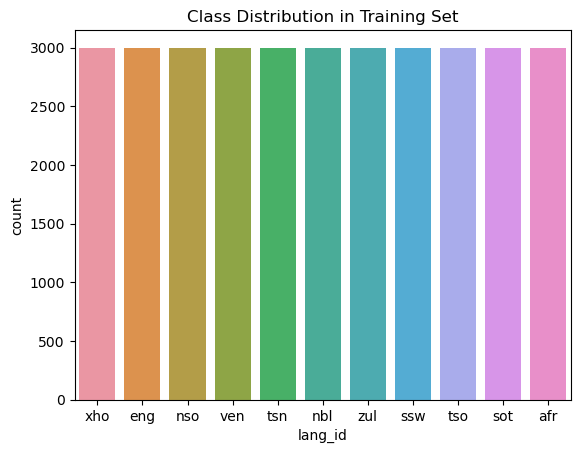

In [68]:
# Check the distribution of classes in the training set
sns.countplot(x='lang_id', data=train_df)
plt.title('Class Distribution in Training Set')
plt.show()


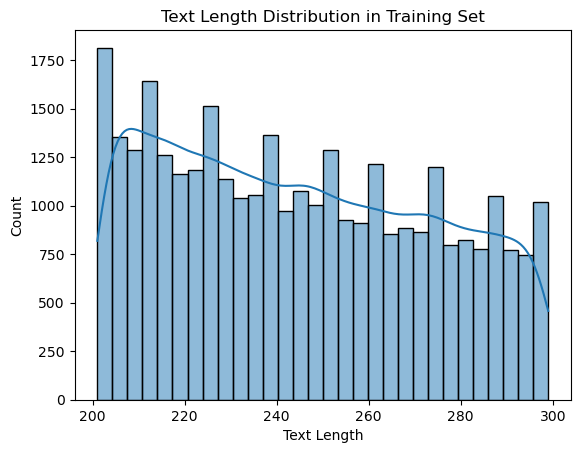

In [69]:
# Explore the distribution of text lengths in the training set
train_df['Text Length'] = train_df['text'].apply(len)
sns.histplot(train_df['Text Length'], bins=30, kde=True)
plt.title('Text Length Distribution in Training Set')
plt.show()

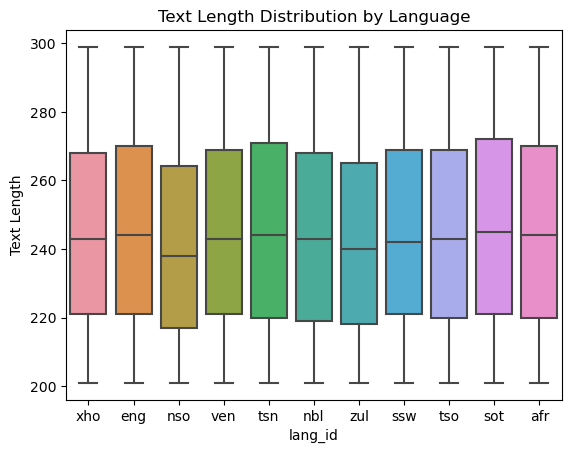

In [70]:
train_df['Text Length'] = train_df['text'].apply(len)
sns.boxplot(x='lang_id', y='Text Length', data=train_df)
plt.title('Text Length Distribution by Language')
plt.show()

In [71]:
# Assuming 'train_df' is your DataFrame containing training data
# You may need to replace it with the actual name of your DataFrame

# Print the class distribution for each language
for language in train_df['lang_id'].unique():
    # Filter data for the current language
    lang_data = train_df[train_df['lang_id'] == language]
    
    # Print the class distribution numbers
    class_distribution = lang_data['lang_id'].value_counts()
    print(f'Class Distribution for Language {language}:\n{class_distribution}\n')


Class Distribution for Language xho:
lang_id
xho    3000
Name: count, dtype: int64

Class Distribution for Language eng:
lang_id
eng    3000
Name: count, dtype: int64

Class Distribution for Language nso:
lang_id
nso    3000
Name: count, dtype: int64

Class Distribution for Language ven:
lang_id
ven    3000
Name: count, dtype: int64

Class Distribution for Language tsn:
lang_id
tsn    3000
Name: count, dtype: int64

Class Distribution for Language nbl:
lang_id
nbl    3000
Name: count, dtype: int64

Class Distribution for Language zul:
lang_id
zul    3000
Name: count, dtype: int64

Class Distribution for Language ssw:
lang_id
ssw    3000
Name: count, dtype: int64

Class Distribution for Language tso:
lang_id
tso    3000
Name: count, dtype: int64

Class Distribution for Language sot:
lang_id
sot    3000
Name: count, dtype: int64

Class Distribution for Language afr:
lang_id
afr    3000
Name: count, dtype: int64



In [72]:
# Additional Text Cleaning and Feature Engineering
import nltk
from nltk.corpus import stopwords

# Download stopwords (you need to do this only once)
nltk.download('stopwords')

# Additional Text Cleaning and Feature Engineering
stop_words = set(stopwords.words('english'))



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Katlego\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [73]:
def clean_text_by_language(text, language):
    words = word_tokenize(text)
    words = [word for word in words if word.isalpha() and word.lower() not in stop_words]
    
    # Additional language-specific preprocessing if needed
    if language == 'afr':
        # Additional preprocessing for Afrikaans
        pass
    elif language == 'eng':
        # Additional preprocessing for English
        pass
    # Add more conditions for other languages
    
    return ' '.join(words)


In [74]:
# Apply language-aware text cleaning
train_df['Cleaned Text'] = train_df.apply(lambda row: clean_text_by_language(row['text'], row['lang_id']), axis=1)


In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate the TfidfVectorizer for the entire dataset
vectorizer = TfidfVectorizer()

# Fit and transform the data
X = vectorizer.fit_transform(train_df['Cleaned Text'])


In [76]:
X = train_df['text']
y = train_df['lang_id']


In [77]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
# Vectorize the data
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)

In [79]:
# Train a model on the entire dataset
model = make_pipeline(MultinomialNB())
model.fit(X_train_vec, y_train)



Pipeline(steps=[('multinomialnb', MultinomialNB())])

In [80]:
# Assuming 'vectorizer' is your trained vectorizer
X_test = vectorizer.transform(test_df['text']).toarray()

# Make predictions
predictions = model.predict(X_test)
